# Project 2: Real-world Data Wrangling - [Movies and TV Shows listings]

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## Table of Contents
1. [Gather](#gather)
2. [Assess](#assess)
3. [Clean](#clean)
4. [Update](#update)
5. [Answer the research question](#answer)

#### Imports

In [1]:
# Imports
import os
import zipfile
import kaggle
import pandas as pd
import numpy as np
import sqlalchemy as sqla
import matplotlib.pyplot as plt

# from bs4 import BeautifulSoup
# import sklearn as sk
# import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## 1. Gather data
<a class="anchor" id="gather"></a>

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.


***Answer***: In this project, we'll explore movies and TV show listings on two popular media and video streaming platforms. We will combine two datasets, Netflix and Amazon Prime, for this analysis. This tabular dataset consists of listings of all the movies and tv shows available on each platform, along with details such as - cast, directors, genre, release year, duration, etc. Both datasets contain a variable corresponding to the title of the movie or TV show, which allows us to combine the two datasets according to this variable.

#### Questions

1. What are most popular genres by movie and by TV shows?
2. How has the trends in the top genres changed over time?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [2]:
# Make directory if it doesn't already exist
folder_name = "Datasets"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Get the current working directory
current_directory = os.getcwd()

# Use os.path.join() to join the current directory and the Datasets folder
file_path = os.path.join(current_directory, folder_name)

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "API" method from Kaggle. This dataset proviodes information specific to Netflix.

Dataset variables:

* **show_id**: Unique ID for every Movie / TV Show
* **type**: Identifier - A Movie or TV Show
* **title**: Title of the Movie / TV Show
* **director**: Director of the Movie / TV Show
* **cast**: Cast of Movie / TV Show
* **country**: Country of Production
* **date_added**: Date added to Netflix
* **release_year**: Release year of the Movie / TV Show
* **rating**: Motion Picture Association film rating system
* **duration**: Total Duration - in minutes or number of seasons
* **listed_in**: Genres
* **description**: The Summary of the Movie /TV Show

URL: https://www.kaggle.com/datasets/shivamb/netflix-shows/data

In [3]:
# FILL IN 1st data gathering and loading method

# Using Kaggle Python API

# Authenticate with the Kaggle API using your credentials
kaggle.api.authenticate()

# Download files from the "shivamb/netflix-shows" dataset on Kaggle
kaggle.api.dataset_download_files(

    "shivamb/netflix-shows", path=file_path, unzip=True)

In [4]:
# Read in the file
df_original_netflix = pd.read_csv("Datasets/netflix_titles.csv")

#### Dataset 2

Type: Zip File

Method: The data was gathered using the "Downloading files manually" method from Kaggle. This dataset contains information specific to Amazon Prime.

Dataset variables:

* **show_id**: Unique ID for every Movie / TV Show
* **type**: Identifier - A Movie or TV Show
* **title**: Title of the Movie / TV Show
* **director**: Director of the Movie / TV Show
* **cast**: Cast of Movie / TV Show
* **country**: Country of Production
* **date_added**: Date added to Amazon Prime
* **release_year**: Release year of the Movie / TV Show
* **rating**: Motion Picture Association film rating system
* **duration**: Total Duration - in minutes or number of seasons
* **listed_in**: Genres
* **description**: The Summary of the Movie /TV Show

URL: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

In [5]:
# FILL IN 2nd data gathering and loading method

# Unzip dataset
with zipfile.ZipFile(
    os.path.join(file_path, "amazon_prime_titles.zip"), "r"
) as zip_ref:
    zip_ref.extractall("Datasets")

In [6]:
# Read in the file
df_original_amazon = pd.read_csv("Datasets/amazon_prime_titles.csv")

## 2. Assess data
<a class="anchor" id="assess"></a>


Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**



### Visual Assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes

In [7]:
df_original_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df_original_amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


It an be seen on first visual observation, that the `show_id` is not sutaible to to match columns as they represent different movies / TV Shows.

### Programmatic Assessment

Pandas' functions and/or methods are used to assess the data

In [9]:
# Get the information of the netflix dataframe using .info()
df_original_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# Get the information of the netflix dataframe using .info()
df_original_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


There are a number of null values for each dataset. However, these will not affect the overall analysis as it will be dropped. The only necesssary columns will be `type, title, release_year, listed_in, duration`.

It is vital that there are no duplicated movie titles in each respective dataset as we will perform a merge later on this variable. Let's check to see if all the movie titles are unique.

In [11]:
# Check for duplicates
print("Number of Netflix duplicates:",

      df_original_netflix.title.duplicated().sum())

Number of Netflix duplicates: 0


In [12]:
# Check for duplicates
print("Number of Amazon duplicates:",

      df_original_amazon.title.duplicated().sum())

Number of Amazon duplicates: 0


There must also only be two types of media on each platform: Movies and TV Shows.

In [13]:
# Check Number of Unique Types
print("Netflix Number of Unique Types:", df_original_netflix.type.nunique())
print("Amazon Prime  Number of Unique Types:",

      df_original_amazon.type.nunique())

Netflix Number of Unique Types: 2
Amazon Prime  Number of Unique Types: 2


### Quality

There are five key dimensions of data quality:

* **Completeness** a metric that helps you understand whether your data is sufficient to answer interesting questions or solve your problem.
* **Validity** is a metric helping you understand how well your data conforms to a defined set of rules for data, also known as a schema.
* **Accuracy** is a metric that helps you understand whether your data accurately represents the reality it aims to depict.
* **Consistency** is a metric that helps you understand two things: whether your data follows a standard format and whether your data’s info matches with information from other data sources.
* **Uniqueness** is a metric that helps you understand whether there are duplicate or overlapping values in your data.


#### Quality Issue 1:


In [14]:
# FILL IN - Inspecting the dataframe visually
df_original_netflix.date_added.head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [15]:
# FILL IN - Inspecting the dataframe visually
df_original_amazon.date_added.head()

0    March 30, 2021
1    March 30, 2021
2    March 30, 2021
3    March 30, 2021
4    March 30, 2021
Name: date_added, dtype: object

In [16]:
# FILL IN - Inspecting the dataframe programmatically
df_original_netflix.dtypes  # Inspect dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [17]:
# FILL IN - Inspecting the dataframe programmatically
df_original_amazon.dtypes  # Inspect dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Issue and justification: It looks like both datasets has its `data_added` column in the incorrect format, This is a validity issue. 

#### Quality Issue 2:

In [18]:
# FILL IN - Inspecting the dataframe visually
df_original_netflix.rating.head(10)

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
5    TV-MA
6       PG
7    TV-MA
8    TV-14
9    PG-13
Name: rating, dtype: object

In [19]:
# FILL IN - Inspecting the dataframe programmatically
df_original_netflix.rating.value_counts()  # Get value counts for ratings

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [20]:
df_original_amazon.rating.value_counts()  # Get value counts for ratings

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

Issue and justification: The Netflix datasets has three erroneous duration scores in its ratings column. This is an consistency issue. This needs to be isolated and moved to the appropiate variable.

#### Quality Issue 3:

In [21]:
# FILL IN - Inspecting the dataframe visually
df_original_netflix.listed_in.head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [22]:
# FILL IN - Inspecting the dataframe visually
df_original_amazon.listed_in.head()

0              Comedy, Drama
1       Drama, International
2    Action, Drama, Suspense
3                Documentary
4             Drama, Fantasy
Name: listed_in, dtype: object

In [23]:
# FILL IN - Inspecting the dataframe programmatically
# Confirm if string type
print("Netflix Genre Type:", type(df_original_netflix.listed_in[0]))
print("Amazon Prime Genre Type:", type(df_original_amazon.listed_in[0]))

Netflix Genre Type: <class 'str'>
Amazon Prime Genre Type: <class 'str'>


Issue and justification: Issue and justification: The `listed_in` column holds the genres for each observation in string format. This should be converted into a list of genres so that each genre becomes a separate element in the list.

### Tidiness

There are three requirements for tidiness:

* Each variable forms a column
* Each observation forms a row
* Each type of observational unit forms a table

The datasets chosen are relatively well-structured with in terms of issues. I could only pick up one tidiness issue. So I stated additional qulity issues.

#### Tidiness Issue 1: 

In [24]:
# FILL IN - Inspecting the dataframe visually
df_original_netflix.duration.head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [25]:
# FILL IN - Inspecting the dataframe visually
df_original_amazon.duration.head()

0    113 min
1    110 min
2     74 min
3     69 min
4     45 min
Name: duration, dtype: object

It looks like duration contains more than one variable in it's column. Let's confirm using `.value_counts()`.

In [26]:
# FILL IN - Inspecting the dataframe programmatically
df_original_netflix.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [27]:
df_original_amazon.duration.value_counts()

duration
1 Season      1342
2 Seasons      229
90 min         223
91 min         220
92 min         203
              ... 
21 Seasons       1
485 min          1
550 min          1
181 min          1
191 min          1
Name: count, Length: 219, dtype: int64

Issue and justification: Both datasets contains a mismatched variables.There are too many variables in one column. It records minutes for movies and tracks TV shows as Seasons in the same column, both stored as strings.  This should be split into 2 columns to track the respective media type appropiately.


## 3. Clean data
<a id="clean" class="anchor"></a>

Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

Make copies of the datasets to ensure the raw dataframes are not impacted

In [28]:
# Make copies of the dataframes
df_clean_amazon = df_original_amazon.copy()
df_clean_netflix = df_original_netflix.copy()

### **Quality Issue 1: DateTime Format**

In [29]:
# FILL IN - Validate the cleaning was successful
print("Netflix Dtypes Before:")
df_clean_netflix.dtypes

Netflix Dtypes Before:


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [30]:
print("Amazon Prime Dtypes Before:")
df_clean_amazon.dtypes

Amazon Prime Dtypes Before:


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

There seems to be some string manipulation needed before we can convert to dateTime.

In [31]:
# Remove white space before and after date_added
df_clean_netflix.date_added = df_clean_netflix.date_added.str.strip()

In [32]:
df_clean_netflix.date_added = pd.to_datetime(df_clean_netflix.date_added)
df_clean_amazon.date_added = pd.to_datetime(df_clean_amazon.date_added)

In [33]:
# FILL IN - Validate the cleaning was successful
print("Netflix Dtypes After:")
df_clean_netflix.dtypes

Netflix Dtypes After:


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [34]:
# FILL IN - Validate the cleaning was successful
print("Amazon Prime Dtypes After:")
df_clean_amazon.dtypes

Amazon Prime Dtypes After:


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Justification: For the first issue, we can use pd.to_dateTime to convert to dateTime format. .strip() was used to remove leading white space to allow the cleaning to be performed. 

### **Quality Issue 2: Erroneous Values in Ratings Column**

In [35]:
# Check nulls for df_clean_netflix.duration
df_clean_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [36]:
df_clean_netflix.rating.value_counts()  # Get value counts for ratings

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [37]:
# FILL IN - Apply the cleaning strategy
df_clean_netflix[df_clean_netflix.rating == "74 min"]  # Locate row with error

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [38]:
# Save to variable
row_to_move_1 = df_clean_netflix[df_clean_netflix.rating == "74 min"]
row_to_move_1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [39]:
# Replace relevant row with correct value in duration column.
df_clean_netflix.at[row_to_move_1.index[0],

                    "duration"] = row_to_move_1.rating.values[0]

# Remove old value with null in rating column
df_clean_netflix.at[row_to_move_1.index[0], "rating"] = np.nan

In [40]:
# FILL IN - Validate the cleaning was successful
df_clean_netflix.iloc[row_to_move_1.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [41]:
# FILL IN - Validate the cleaning was successful
df_clean_netflix[df_clean_netflix.rating == "74 min"]  # should be empty

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Repeat for other rows

In [42]:
# FILL IN - Apply the cleaning strategy

# Save to variable
# Locate row with error
row_to_move_2 = df_clean_netflix[df_clean_netflix.rating == "84 min"]
# Locate row with error
row_to_move_3 = df_clean_netflix[df_clean_netflix.rating == "66 min"]

In [43]:
# Replace relevant row with correct value in duration column.
df_clean_netflix.at[row_to_move_2.index[0],

                    "duration"] = row_to_move_2.rating.values[0]
# Remove old value with null in rating column
df_clean_netflix.at[row_to_move_2.index[0], "rating"] = np.nan

In [44]:
# Replace relevant row with correct value in duration column.
df_clean_netflix.at[row_to_move_3.index[0],

                    "duration"] = row_to_move_3.rating.values[0]
# Remove old value with null in rating column
df_clean_netflix.at[row_to_move_3.index[0], "rating"] = np.nan

In [45]:
# FILL IN - Validate the cleaning was successful
df_clean_netflix.iloc[row_to_move_2.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [46]:
# FILL IN - Validate the cleaning was successful
df_clean_netflix.iloc[row_to_move_3.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [47]:
# FILL IN - Validate the cleaning was successful using nulls
df_clean_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Justification: The duration column now complete with no nulls. Th use of string slicing solve the issue moving the value to appropiate column.

### **Quality Issue 3: Convert lsted_in column into list of genres**

In [48]:
df_clean_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8800 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [49]:
df_clean_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7585 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    datetime64[ns]
 7   release_year  9668 non-null   int64         
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 906.5+ KB


In [50]:
# FILL IN - Apply the cleaning strategy

# Split the Genres: Split the genres string into a list of genres so that each genre becomes a separate element in the list
df_clean_netflix["genres"] = df_clean_netflix["listed_in"].str.split(", ")
df_clean_amazon["genres"] = df_clean_amazon["listed_in"].str.split(", ")

In [51]:
# Drop unnecessary `listed_in` column
df_clean_netflix.drop(columns=["listed_in"], inplace=True)
df_clean_amazon.drop(columns=["listed_in"], inplace=True)

In [52]:
# FILL IN - Validate the cleaning was successful
df_clean_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"


In [53]:
# FILL IN - Validate the cleaning was successful
df_clean_amazon.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genres
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,113 min,A small fishing village must procure a local d...,"[Comedy, Drama]"
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,A Metro Family decides to fight a Cyber Crimin...,"[Drama, International]"


Justification: Splitting the `listed_in` column on commas creates a column with a list of genres per observation. This will be used later with .explode() and .groupby() functions to do the analysis. We can now drop the original column.

### **Tidiness Issue 1: Multiple variables in Duration column**

In [54]:
# FILL IN - Apply the cleaning strategy

# Extract numeric values and units into separate columns
df_durations = df_clean_netflix.duration.str.extract(
    r"(?P<minutes>\d+) min|(?P<seasons>\d+) Seasons"
)

In [55]:
df_durations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   minutes  6131 non-null   object
 1   seasons  883 non-null    object
dtypes: object(2)
memory usage: 137.7+ KB


In [56]:
# Convert the extracted columns to numeric type then convert to int
df_durations.minutes = pd.to_numeric(

    df_durations.minutes).astype(pd.Int64Dtype())

df_durations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   minutes  6131 non-null   Int64 
 1   seasons  883 non-null    object
dtypes: Int64(1), object(1)
memory usage: 146.3+ KB


In [57]:
df_durations.seasons = pd.to_numeric(

    df_durations.seasons).astype(pd.Int64Dtype())

In [58]:
# Combine into clean dataset and drop duration column
df_clean_netflix = pd.concat([df_clean_netflix, df_durations], axis=1).drop(
    columns=["duration"]
)

In [59]:
# FILL IN - Validate the cleaning was successful
df_clean_netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,description,genres,minutes,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",[Documentaries],90,<NA>
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",<NA>,2


Repeat with Amazon prime dataset

In [60]:
# Extract numeric values and units into separate columns
df_durations = df_clean_amazon.duration.str.extract(
    r"(?P<minutes>\d+) min|(?P<seasons>\d+) Seasons"
)

In [61]:
# Convert the extracted columns to numeric type
df_durations.minutes = pd.to_numeric(

    df_durations.minutes).astype(pd.Int64Dtype())

In [62]:
# Convert the extracted columns to numeric type
df_durations.seasons = pd.to_numeric(

    df_durations.seasons).astype(pd.Int64Dtype())

In [63]:
# Combine into clean dataset and drop duration column
df_clean_amazon = pd.concat([df_clean_amazon, df_durations], axis=1).drop(
    columns=["duration"]
)

In [64]:
# FILL IN - Validate the cleaning was successful
df_clean_amazon.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,description,genres,minutes,seasons
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,NaN,A small fishing village must procure a local d...,"[Comedy, Drama]",113,<NA>
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,A Metro Family decides to fight a Cyber Crimin...,"[Drama, International]",110,<NA>


Justification: Using regex, we extracted the minutes and seasons into two seperate columns. This was converted into int numeric types. This was then combined into the original datatsets respectively for analysis later.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [65]:
# FILL IN - Remove unnecessary variables and combine datasets
df_clean_amazon = df_clean_amazon[
    ["type", "title", "date_added", "release_year", "genres", "minutes", "seasons"]
]

df_clean_netflix = df_clean_netflix[
    ["type", "title", "date_added", "release_year", "genres", "minutes", "seasons"]
]

In [66]:
df_clean_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   date_added    155 non-null    datetime64[ns]
 3   release_year  9668 non-null   int64         
 4   genres        9668 non-null   object        
 5   minutes       7814 non-null   Int64         
 6   seasons       512 non-null    Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(3)
memory usage: 547.7+ KB


In [67]:
df_clean_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   date_added    8797 non-null   datetime64[ns]
 3   release_year  8807 non-null   int64         
 4   genres        8807 non-null   object        
 5   minutes       6131 non-null   Int64         
 6   seasons       883 non-null    Int64         
dtypes: Int64(2), datetime64[ns](1), int64(1), object(3)
memory usage: 499.0+ KB


In [68]:
merged_df = pd.merge(
    df_clean_netflix,
    df_clean_amazon,
    on=["title"],
    how="outer",
    indicator=True,
)

merged_df.head(3)

,type_x,title,date_added_x,release_year_x,genres_x,minutes_x,seasons_x,type_y,date_added_y,release_year_y,genres_y,minutes_y,seasons_y,_merge
0,Movie,Dick Johnson Is Dead,2021-09-25,2020.0,[Documentaries],90,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,left_only
1,TV Show,Blood & Water,2021-09-24,2021.0,"[International TV Shows, TV Dramas, TV Mysteries]",<NA>,2,NaN,NaT,NaN,NaN,<NA>,<NA>,left_only
2,TV Show,Ganglands,2021-09-24,2021.0,"[Crime TV Shows, International TV Shows, TV Ac...",<NA>,<NA>,NaN,NaT,NaN,NaN,<NA>,<NA>,left_only


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type_x          8807 non-null   object        
 1   title           18086 non-null  object        
 2   date_added_x    8797 non-null   datetime64[ns]
 3   release_year_x  8807 non-null   float64       
 4   genres_x        8807 non-null   object        
 5   minutes_x       6131 non-null   Int64         
 6   seasons_x       883 non-null    Int64         
 7   type_y          9668 non-null   object        
 8   date_added_y    155 non-null    datetime64[ns]
 9   release_year_y  9668 non-null   float64       
 10  genres_y        9668 non-null   object        
 11  minutes_y       7814 non-null   Int64         
 12  seasons_y       512 non-null    Int64         
 13  _merge          18086 non-null  category      
dtypes: Int64(4), category(1), datetime64[ns](2), float64(2

In [70]:
merged_df["type"] = merged_df["type_x"].combine_first(merged_df["type_y"])
merged_df["date_added"] = merged_df["date_added_x"].combine_first(
    merged_df["date_added_y"]
)
merged_df["release_year"] = merged_df["release_year_x"].combine_first(
    merged_df["release_year_y"]
)
merged_df["genres"] = merged_df["genres_x"].combine_first(

    merged_df["genres_y"])

merged_df["minutes"] = merged_df["minutes_x"].combine_first(

    merged_df["minutes_y"])
merged_df["seasons"] = merged_df["seasons_x"].combine_first(
    merged_df["seasons_y"])

In [71]:
merged_df._merge.replace("left_only", "Netflix", inplace=True)
merged_df._merge.replace("right_only", "Amazon", inplace=True)

In [72]:
merged_df.rename(columns={"_merge": "platform"}, inplace=True)

In [73]:
merged_df.drop(
    columns=[
        "type_x",
        "date_added_x",
        "release_year_x",
        "genres_x",
        "minutes_x",
        "seasons_x",
        "type_y",
        "date_added_y",
        "release_year_y",
        "genres_y",
        "minutes_y",
        "seasons_y",
    ],
    inplace=True,
)

In [74]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         18086 non-null  object        
 1   platform      18086 non-null  category      
 2   type          18086 non-null  object        
 3   date_added    8946 non-null   datetime64[ns]
 4   release_year  18086 non-null  float64       
 5   genres        18086 non-null  object        
 6   minutes       13686 non-null  Int64         
 7   seasons       1364 non-null   Int64         
dtypes: Int64(2), category(1), datetime64[ns](1), float64(1), object(3)
memory usage: 1.0+ MB


In [75]:
merged_df.head()

,title,platform,type,date_added,release_year,genres,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2021-09-25,2020.0,[Documentaries],90,<NA>
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,"[International TV Shows, TV Dramas, TV Mysteries]",<NA>,2
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,"[Crime TV Shows, International TV Shows, TV Ac...",<NA>,<NA>
3,Jailbirds New Orleans,Netflix,TV Show,2021-09-24,2021.0,"[Docuseries, Reality TV]",<NA>,<NA>
4,Kota Factory,Netflix,TV Show,2021-09-24,2021.0,"[International TV Shows, Romantic TV Shows, TV...",<NA>,2


## 4. Update your data store
<a id="update" class="anchor"></a>

Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [76]:
# FILL IN - saving data
merged_df.to_csv("Datasets/movie_and_tv_show_listings.csv", index=False)

For the SQL code to work we must first revert the genres listng to a string as the type 'list' is not supported.

In [77]:
sql_merged_df = merged_df.copy()
# Function to combine lists into strings


def combine_lists(row):
    return ", ".join(map(str, row))


# Apply the function to the 'column1' and create a new 'combined' column
sql_merged_df["genres"] = sql_merged_df["genres"].apply(combine_lists)

sql_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         18086 non-null  object        
 1   platform      18086 non-null  category      
 2   type          18086 non-null  object        
 3   date_added    8946 non-null   datetime64[ns]
 4   release_year  18086 non-null  float64       
 5   genres        18086 non-null  object        
 6   minutes       13686 non-null  Int64         
 7   seasons       1364 non-null   Int64         
dtypes: Int64(2), category(1), datetime64[ns](1), float64(1), object(3)
memory usage: 1.0+ MB


In [78]:
# Create SQLAlchemy Engine and empty  database
engine = sqla.create_engine("sqlite:///movie_and_tv_show_listings.db")

# Store cleaned master DataFrame in a table called clean_movie_and_tv_show_listings_table in movie_and_tv_show_listings.db
sql_merged_df.to_sql(
    "clean_movie_and_tv_show_listings_table", engine, index=False, if_exists="replace"
)

# Store raw  DataFrame in a table called df_original_netflix in movie_and_tv_show_listings.db
df_original_netflix.to_sql(
    "raw_movie_and_tv_show_listings_netflix", engine, index=False, if_exists="replace"
)

# Store raw  DataFrame in a table called df_original_amazon in movie_and_tv_show_listings.db
df_original_amazon.to_sql(
    "raw_movie_and_tv_show_listings_amazon", engine, index=False, if_exists="replace"
)

9668

Test the above sql schema worked.

In [79]:
# Read the brand new data in that database back into a pandas DataFrame.
df_gather_clean = pd.read_sql(
    sql=sqla.text("SELECT * FROM movie_and_tv_show_listings_table"),
    con=engine.connect(),
)

df_gather_clean.head()

,title,platform,type,date_added,release_year,genres,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2021-09-25 00:00:00.000000,2020.0,Documentaries,90.0,NaN
1,Blood & Water,Netflix,TV Show,2021-09-24 00:00:00.000000,2021.0,"International TV Shows, TV Dramas, TV Mysteries",NaN,2.0
2,Ganglands,Netflix,TV Show,2021-09-24 00:00:00.000000,2021.0,"Crime TV Shows, International TV Shows, TV Act...",NaN,NaN
3,Jailbirds New Orleans,Netflix,TV Show,2021-09-24 00:00:00.000000,2021.0,"Docuseries, Reality TV",NaN,NaN
4,Kota Factory,Netflix,TV Show,2021-09-24 00:00:00.000000,2021.0,"International TV Shows, Romantic TV Shows, TV ...",NaN,2.0


In [80]:
# Read the brand new data in that database back into a pandas DataFrame.
df_gather_netflix_raw = pd.read_sql(
    sql=sqla.text("SELECT * FROM raw_movie_and_tv_show_listings_netflix"),
    con=engine.connect(),
)

df_gather_netflix_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [81]:
# Read the brand new data in that database back into a pandas DataFrame.
df_gather_amazon_raw = pd.read_sql(
    sql=sqla.text("SELECT * FROM raw_movie_and_tv_show_listings_amazon"),
    con=engine.connect(),
)

df_gather_amazon_raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,None,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,None,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,None,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,None,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## 5. Answer the research question
<a id="answer" class="anchor"></a>

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research questions:* 

1. What are most popular genres by movie and TV shows?
2. How has the trends in the genres changed over time?

In [82]:
df = merged_df.copy(deep=True)
df.head()

,title,platform,type,date_added,release_year,genres,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2021-09-25,2020.0,[Documentaries],90,<NA>
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,"[International TV Shows, TV Dramas, TV Mysteries]",<NA>,2
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,"[Crime TV Shows, International TV Shows, TV Ac...",<NA>,<NA>
3,Jailbirds New Orleans,Netflix,TV Show,2021-09-24,2021.0,"[Docuseries, Reality TV]",<NA>,<NA>
4,Kota Factory,Netflix,TV Show,2021-09-24,2021.0,"[International TV Shows, Romantic TV Shows, TV...",<NA>,2


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18086 entries, 0 to 18085
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         18086 non-null  object        
 1   platform      18086 non-null  category      
 2   type          18086 non-null  object        
 3   date_added    8946 non-null   datetime64[ns]
 4   release_year  18086 non-null  float64       
 5   genres        18086 non-null  object        
 6   minutes       13686 non-null  Int64         
 7   seasons       1364 non-null   Int64         
dtypes: Int64(2), category(1), datetime64[ns](1), float64(1), object(3)
memory usage: 1.0+ MB


In [84]:
# Visual 1 - FILL IN
# Count the genres for movies and TV shows separately
movie_genres = df[df["type"] == "Movie"]["genres"].explode().value_counts()
tv_show_genres = df[df["type"] == "TV Show"]["genres"].explode().value_counts()

Text(0.5, 1.0, 'Counts of Genres for Movies')

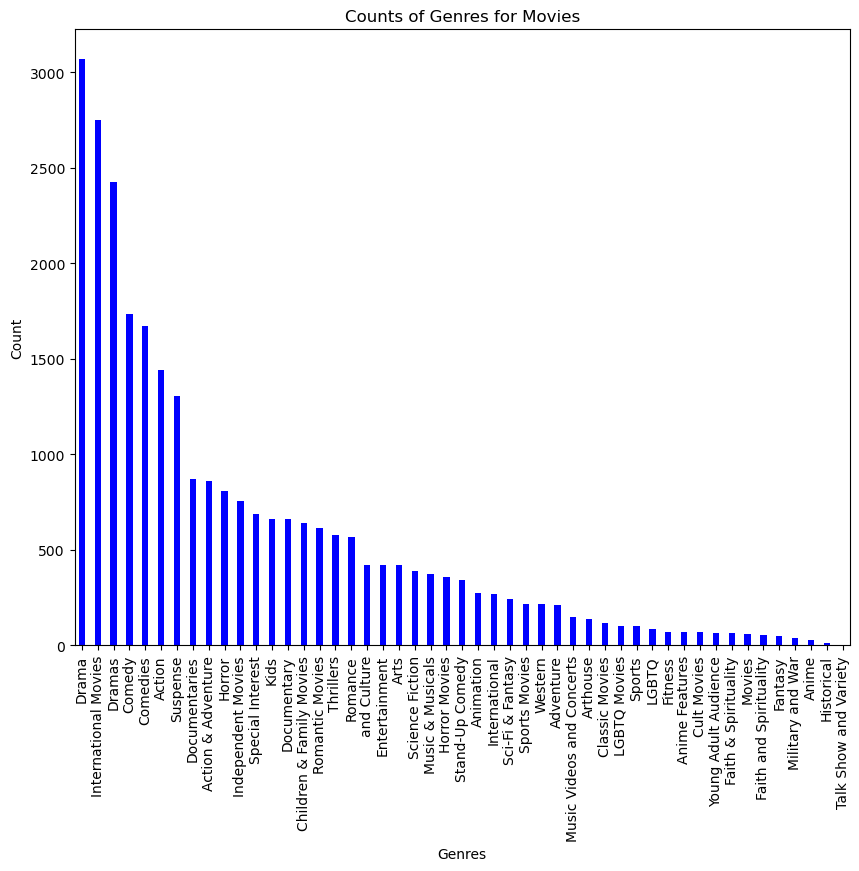

In [85]:
# Bar chart for Movie genres
movie_genres.plot(kind="bar", color="blue", width=0.4,

                  label="Movies", figsize=(10, 8))
# Set plot labels and title
plt.ylabel("Count")
plt.xlabel("Genres")
plt.title("Counts of Genres for Movies")

Text(0.5, 1.0, 'Counts of Genres for TV SHows')

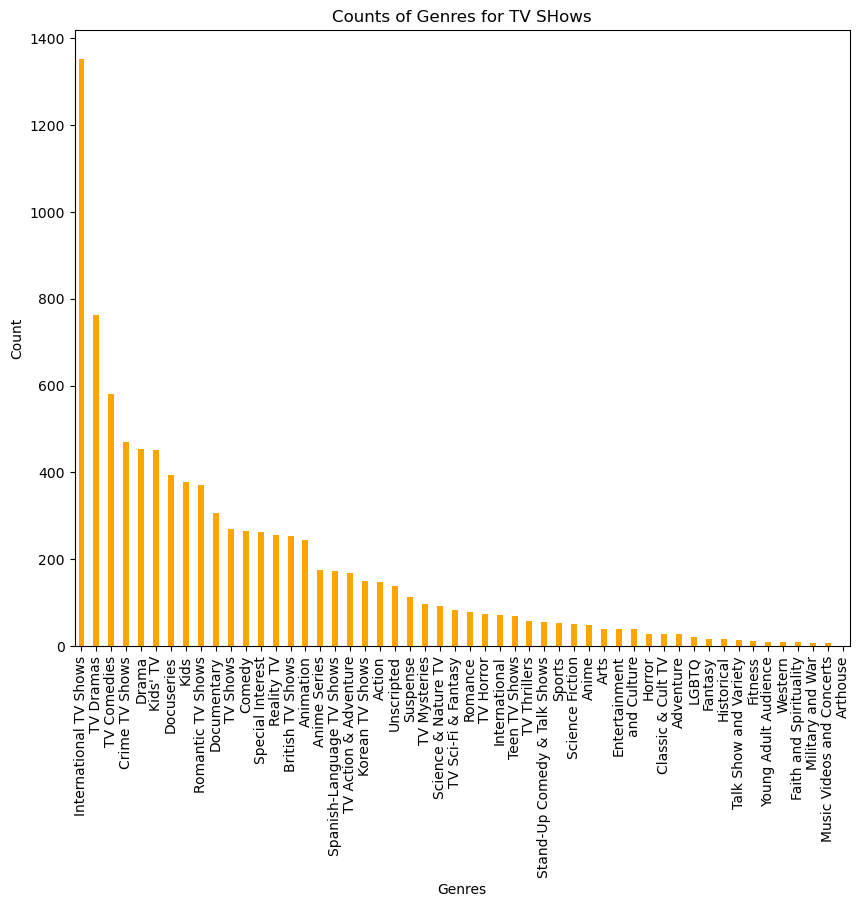

In [86]:
# Bar chart for TV Show genres

tv_show_genres.plot(kind="bar", color="orange", width=0.4, figsize=(10, 8))
# Set plot labels and title
plt.ylabel("Count")
plt.xlabel("Genres")
plt.title("Counts of Genres for TV SHows")

In [87]:
top_10_movie_genres = movie_genres[:10].index
top_10_movie_genres

Index(['Drama', 'International Movies', 'Dramas', 'Comedy', 'Comedies',
       'Action', 'Suspense', 'Documentaries', 'Action & Adventure', 'Horror'],
      dtype='object', name='genres')

In [88]:
top_10_TV_show_genres = tv_show_genres[:10].index
top_10_TV_show_genres

Index(['International TV Shows', 'TV Dramas', 'TV Comedies', 'Crime TV Shows',
       'Drama', 'Kids' TV', 'Docuseries', 'Kids', 'Romantic TV Shows',
       'Documentary'],
      dtype='object', name='genres')

In [89]:
# Visual 2 - FILL IN
df_explode = df.explode("genres")

In [90]:
# Visual 2 - FILL IN
df_explode = df.explode("genres")
df_explode

,title,platform,type,date_added,release_year,genres,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2021-09-25,2020.0,Documentaries,90,<NA>
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,International TV Shows,<NA>,2
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,TV Dramas,<NA>,2
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,TV Mysteries,<NA>,2
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,Crime TV Shows,<NA>,<NA>
...,...,...,...,...,...,...,...,...
18084,Maradona: Blessed Dream,Amazon,TV Show,NaT,2021.0,Drama,<NA>,<NA>
18084,Maradona: Blessed Dream,Amazon,TV Show,NaT,2021.0,Sports,<NA>,<NA>
18085,Harry Brown,Amazon,Movie,NaT,2010.0,Action,103,<NA>
18085,Harry Brown,Amazon,Movie,NaT,2010.0,Drama,103,<NA>


In [91]:
df_explode_movies = df_explode[df_explode.type == "Movie"]
df_explode_movies

,title,platform,type,date_added,release_year,genres,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2021-09-25,2020.0,Documentaries,90,<NA>
6,My Little Pony: A New Generation,Netflix,Movie,2021-09-24,2021.0,Children & Family Movies,91,<NA>
7,Sankofa,Netflix,Movie,2021-09-24,1993.0,Dramas,125,<NA>
7,Sankofa,Netflix,Movie,2021-09-24,1993.0,Independent Movies,125,<NA>
7,Sankofa,Netflix,Movie,2021-09-24,1993.0,International Movies,125,<NA>
...,...,...,...,...,...,...,...,...
18081,Pride Of The Bowery,Amazon,Movie,NaT,1940.0,Comedy,60,<NA>
18083,Outpost,Amazon,Movie,NaT,2008.0,Action,90,<NA>
18085,Harry Brown,Amazon,Movie,NaT,2010.0,Action,103,<NA>
18085,Harry Brown,Amazon,Movie,NaT,2010.0,Drama,103,<NA>


In [92]:
df_explode_TV_shows = df_explode[df_explode.type == "TV Show"]
df_explode_TV_shows

,title,platform,type,date_added,release_year,genres,minutes,seasons
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,International TV Shows,<NA>,2
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,TV Dramas,<NA>,2
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,TV Mysteries,<NA>,2
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,Crime TV Shows,<NA>,<NA>
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,International TV Shows,<NA>,<NA>
...,...,...,...,...,...,...,...,...
18073,DaFUNdamentals Series,Amazon,TV Show,NaT,2021.0,Kids,<NA>,<NA>
18079,Terrahawks,Amazon,TV Show,NaT,1983.0,TV Shows,<NA>,3
18082,Planet Patrol,Amazon,TV Show,NaT,2018.0,TV Shows,<NA>,4
18084,Maradona: Blessed Dream,Amazon,TV Show,NaT,2021.0,Drama,<NA>,<NA>


In [93]:
# Isolate rows with 'genres' matching the target genres
isolated_movie_rows = df_explode_movies[
    df_explode_movies["genres"].isin(top_10_movie_genres)
]
isolated_movie_rows

,title,platform,type,date_added,release_year,genres,minutes,seasons
0,Dick Johnson Is Dead,Netflix,Movie,2021-09-25,2020.0,Documentaries,90,<NA>
7,Sankofa,Netflix,Movie,2021-09-24,1993.0,Dramas,125,<NA>
7,Sankofa,Netflix,Movie,2021-09-24,1993.0,International Movies,125,<NA>
9,The Starling,Netflix,Movie,2021-09-24,2021.0,Comedies,104,<NA>
9,The Starling,Netflix,Movie,2021-09-24,2021.0,Dramas,104,<NA>
...,...,...,...,...,...,...,...,...
18081,Pride Of The Bowery,Amazon,Movie,NaT,1940.0,Comedy,60,<NA>
18083,Outpost,Amazon,Movie,NaT,2008.0,Action,90,<NA>
18085,Harry Brown,Amazon,Movie,NaT,2010.0,Action,103,<NA>
18085,Harry Brown,Amazon,Movie,NaT,2010.0,Drama,103,<NA>


In [94]:
# Isolate rows with 'genres' matching the target genres
isolated_TV_show_rows = df_explode_TV_shows[
    df_explode_TV_shows["genres"].isin(top_10_TV_show_genres)
]
isolated_TV_show_rows

,title,platform,type,date_added,release_year,genres,minutes,seasons
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,International TV Shows,<NA>,2
1,Blood & Water,Netflix,TV Show,2021-09-24,2021.0,TV Dramas,<NA>,2
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,Crime TV Shows,<NA>,<NA>
2,Ganglands,Netflix,TV Show,2021-09-24,2021.0,International TV Shows,<NA>,<NA>
3,Jailbirds New Orleans,Netflix,TV Show,2021-09-24,2021.0,Docuseries,<NA>,<NA>
...,...,...,...,...,...,...,...,...
18060,Lunkerville,Amazon,TV Show,2021-10-10,2021.0,Documentary,<NA>,2
18063,Let's Go Cozy Coupe! - Cartoons for Kids,Amazon,TV Show,NaT,2021.0,Kids,<NA>,<NA>
18069,Glass Room,Amazon,TV Show,NaT,2019.0,Drama,<NA>,<NA>
18073,DaFUNdamentals Series,Amazon,TV Show,NaT,2021.0,Kids,<NA>,<NA>


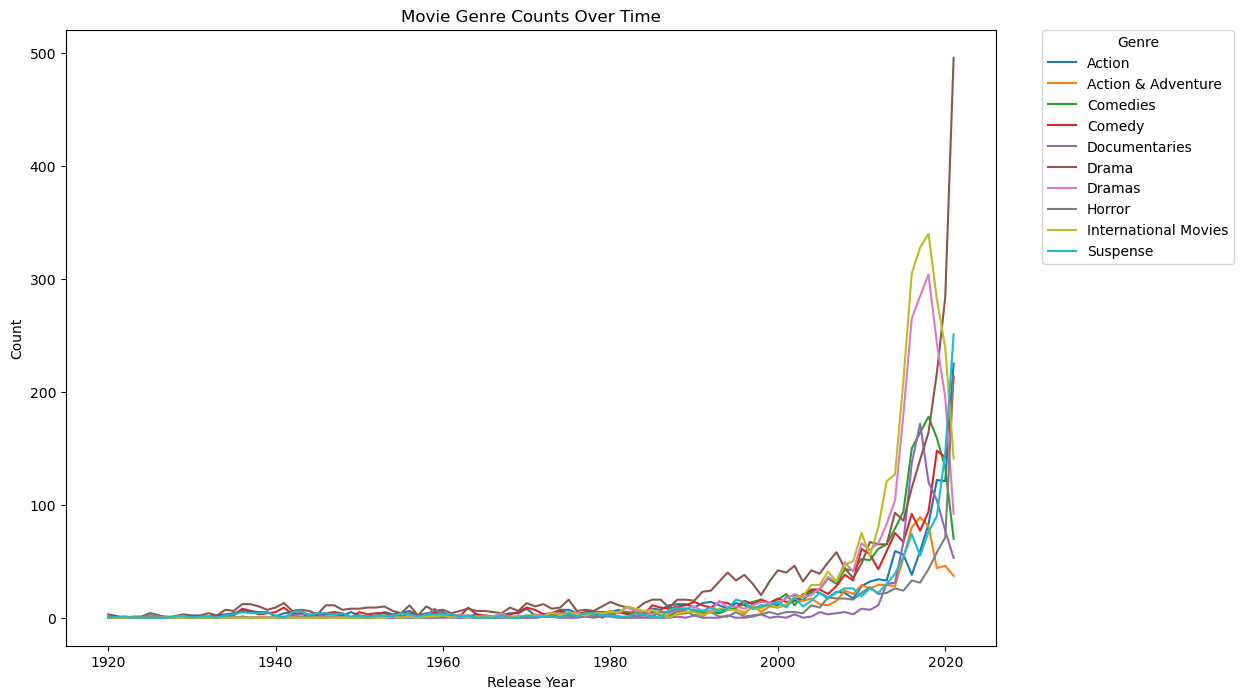

In [95]:
# Group by 'genres' and 'release_year', count occurrences, and reset index
grouped_df = (
    isolated_movie_rows.groupby(["genres", "release_year"])
    .size()
    .reset_index(name="count")
)

# Pivot the DataFrame to have genres in rows and years in columns
pivot_df = grouped_df.pivot_table(
    index="release_year", columns="genres", values="count", fill_value=0
)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each genre as a separate line with the legend as the genre
for genre in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[genre], label=genre)

# Set plot labels and title
ax.set_ylabel("Count")
ax.set_xlabel("Release Year")
ax.set_title("Movie Genre Counts Over Time")

# Add legend
ax.legend(title="Genre", bbox_to_anchor=(1.05, 1),

          loc="upper left", borderaxespad=0.0)

# Show the plot
plt.show()

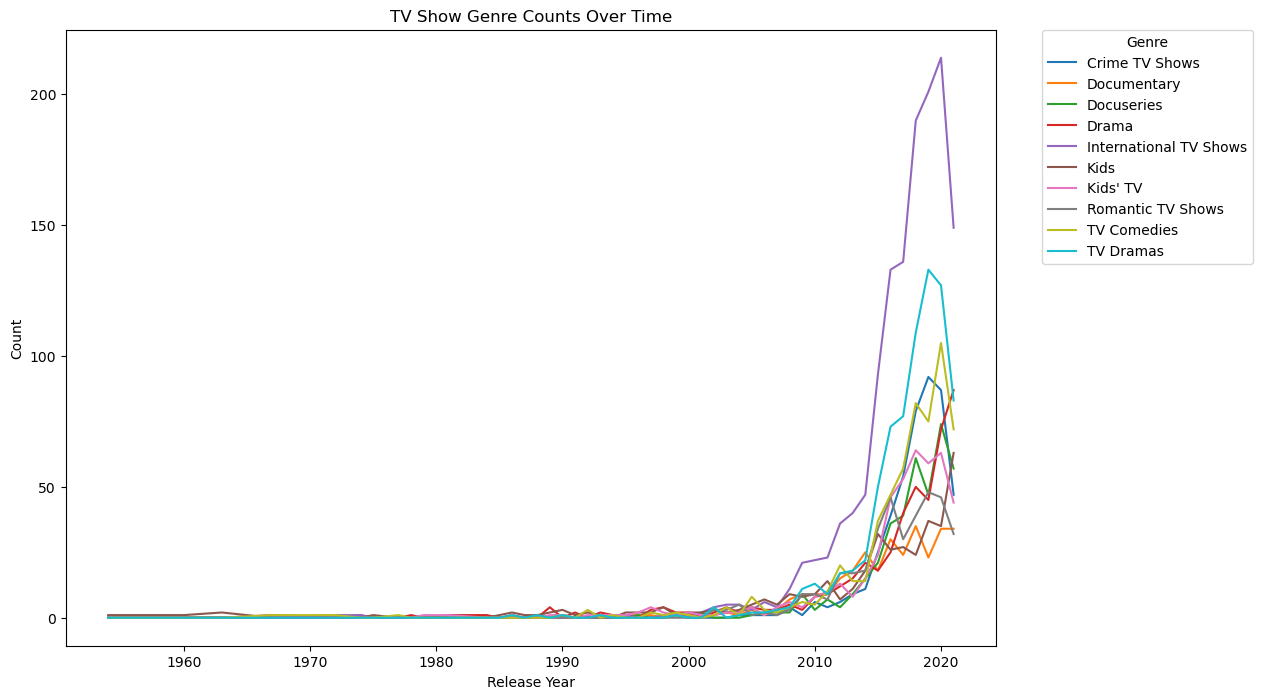

In [96]:
# Group by 'genres' and 'release_year', count occurrences, and reset index
grouped_df = (
    isolated_TV_show_rows.groupby(["genres", "release_year"])
    .size()
    .reset_index(name="count")
)

# Pivot the DataFrame to have genres in rows and years in columns
pivot_df = grouped_df.pivot_table(
    index="release_year", columns="genres", values="count", fill_value=0
)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each genre as a separate line with the legend as the genre
for genre in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[genre], label=genre)

# Set plot labels and title
ax.set_ylabel("Count")
ax.set_xlabel("Release Year")
ax.set_title("TV Show Genre Counts Over Time")

# Add legend
ax.legend(title="Genre", bbox_to_anchor=(1.05, 1),

          loc="upper left", borderaxespad=0.0)

# Show the plot
plt.show()

*Answer to research questions:* 

1. What are most popular genres by movie and TV shows?

For movies, the most popular genres are dramas, followed by comedies then action, documentaries and horror. In terms of TV show, dramas are the leading genre, followed by comedies, crime, docuseries and romantic shows.

2. How has the trends in the genres changed over time?

Both TV shows and Movies have a dramatic spike around the early 2000s, all all types of genres. Drama is by far the most watched movie type, action and comedies have also increased signifcantly in this time. For TV shows, once againm drama is the dominant genres prodcued, however crime and comedies are increasing signficantly as well. 

NOTE: What is interesting to note the quantity of "international" mvoies and TV shows. Since these fail to decribe a distinct genre I have exlcuded them from analysis - but perhaps they are a genre in their own right or share features with other genres.


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I would find more datasets to help fill in missing values. Further more, I would prefer to save TV Shows seperately from Movies in two datasets as this makes more sense in terms of tidiness. I would also inspect each variable i  greater details, using regex and other methods to narrow down the genre options to more common categories. This would allow a more granular analsyis of the daata.

### Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html project_2.ipynb